<a href="https://colab.research.google.com/github/mirzaaa101/BengaliSent-A-Multi-Domain-Bangla-Sentiment-Analysis-Dataset/blob/main/push_dataset_to_hf_hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pwd
%cd /content/drive/MyDrive/Colab Notebooks
!git clone https://github.com/mirzaaa101/BengaliSent-A-Multi-Domain-Bangla-Sentiment-Analysis-Dataset.git

/content
/content/drive/MyDrive/Colab Notebooks
fatal: destination path 'BengaliSent-A-Multi-Domain-Bangla-Sentiment-Analysis-Dataset' already exists and is not an empty directory.


In [25]:
import pandas as pd

ROOT = "/content/drive/MyDrive/Colab Notebooks/BengaliSent-A-Multi-Domain-Bangla-Sentiment-Analysis-Dataset"
df = pd.read_csv(f"{ROOT}/BengaliSent_Annotated.csv")
df.head()

,Comment,Sentiment
0,২০২৪কে কে শুনেছেন লাইক করবেন,Positive
1,২০১৮ সালে এই গানটি শুনি আজকে আবার শুনলাম,Positive
2,আমি এ গানে নাচ করছি,Positive
3,অনেক দিন পর গান টার কথা মনে পরলো সুনতে আইলাম য...,Positive
4,আজকে সৃতি রেখে গেলাম কমেন্ট করে,Positive


In [26]:
df.rename(columns={"Comment": "text", "Sentiment": "label"}, inplace=True)

**Looking at the Class Distribution**

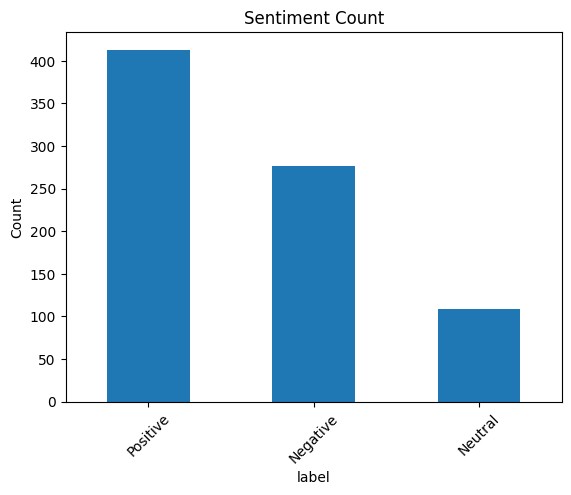

In [27]:
import matplotlib.pyplot as plt

df["label"].value_counts().plot(kind="bar", rot=45, title="Sentiment Count")
plt.ylabel("Count")
plt.show()

**How Long Each Comments**

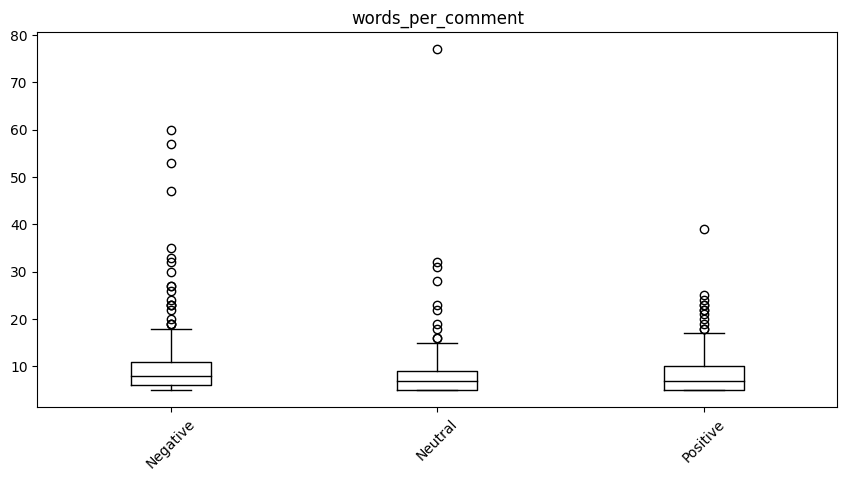

In [29]:
df["words_per_comment"] = df["text"].apply(lambda x: len(x.split()))
df.boxplot("words_per_comment", by="label", rot=45, figsize=(10, 5), grid=False, color="black")
df.drop("words_per_comment", axis=1, inplace=True)
plt.suptitle("")
plt.xlabel("")
plt.show()

**Convert DataFrame to Datasets**

In [ ]:
!pip install datasets

In [30]:
from datasets import Dataset, DatasetDict, ClassLabel

dataset = Dataset.from_pandas(df)

class_label = ClassLabel(names=list(df['label'].unique()))
dataset = dataset.cast_column('label', class_label)

train_test_split = dataset.train_test_split(test_size=0.3, stratify_by_column='label')
valid_test_split = train_test_split['test'].train_test_split(test_size=0.5, stratify_by_column='label')

bengali_sent = DatasetDict({
    'train': train_test_split['train'],
    'validation': valid_test_split['train'],
    'test': valid_test_split['test']
})
print(bengali_sent)

Casting the dataset:   0%|          | 0/799 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 559
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 120
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 120
    })
})


In [31]:
train_ds = bengali_sent["train"]
valid_ds = bengali_sent["validation"]
test_ds = bengali_sent["test"]

**Push The Dataset Into HuggingFace**

In [33]:
from huggingface_hub import notebook_login

notebook_login()

In [34]:
bengali_sent.push_to_hub("mirzaaa10/bengali_sent")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/1 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/mirzaaa10/bengali_sent/commit/000d605fb63ebf51eeff9b804cd78dcf258e3382', commit_message='Upload dataset', commit_description='', oid='000d605fb63ebf51eeff9b804cd78dcf258e3382', pr_url=None, pr_revision=None, pr_num=None)

In [35]:
from datasets import load_dataset

ds = load_dataset("mirzaaa10/bengali_sent")
print(ds)

README.md:   0%|          | 0.00/3.02k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/29.6k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/9.03k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/8.31k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/559 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/120 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/120 [00:00<?, ? examples/s]